In [2]:
import mne

In [4]:
from mne.io import read_raw_eeglab
from mne.time_frequency import tfr_array_morlet
from mne.preprocessing import ICA
from mne.channels import make_standard_montage

In [5]:
import numpy as np
import pandas as pd

In [6]:
import os

# Load and organize the data

In [7]:
participant_ids = [f"sub-{str(i).zfill(3)}" for i in range(1, 21)]  # Generate participant IDs
sound_names = [f"ses-{str(i).zfill(2)}" for i in range(1, 13)]  # Generate session names (sounds)
common_path = '/Users/mac/Desktop/cad_data/ds003774/'

In [9]:
raw_data = {}
for participant_id in participant_ids:
    raw_data[participant_id] = {}
    for sound_name in sound_names:
        eeg_folder = os.path.join(common_path, participant_id, sound_name, 'eeg')
        run_number = int(sound_name.split('-')[1])
        eeg_filename = f"{participant_id}_{sound_name}_task-MusicListening_run-{run_number}_eeg.set"
        file_path = os.path.join(eeg_folder, eeg_filename)
        print(f"Attempting to load: {file_path}")  # Print the file path
        if os.path.exists(file_path):
            raw = read_raw_eeglab(file_path, preload=True)
            raw_data[participant_id][sound_name] = raw
        else:
            print(f"File not found: {file_path}")  # Print a message if the file does not exist

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-01/eeg/sub-001_ses-01_task-MusicListening_run-1_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-02/eeg/sub-001_ses-02_task-MusicListening_run-2_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-03/eeg/sub-001_ses-03_task-MusicListening_run-3_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-04/eeg/sub-001_ses-04_task-MusicListening_run-4_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-05/eeg/sub-001_ses-05_task-MusicListening_run-5_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_ra

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-06/eeg/sub-001_ses-06_task-MusicListening_run-6_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-07/eeg/sub-001_ses-07_task-MusicListening_run-7_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-08/eeg/sub-001_ses-08_task-MusicListening_run-8_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-09/eeg/sub-001_ses-09_task-MusicListening_run-9_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-10/eeg/sub-001_ses-10_task-MusicListening_run-10_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-11/eeg/sub-001_ses-11_task-MusicListening_run-11_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-001/ses-12/eeg/sub-001_ses-12_task-MusicListening_run-12_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-01/eeg/sub-002_ses-01_task-MusicListening_run-1_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-02/eeg/sub-002_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-03/eeg/sub-002_ses-03_task-MusicListening_run-3_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-04/eeg/sub-002_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-05/eeg/sub-002_ses-05_task-MusicListening_run-5_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-06/eeg/sub-002_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-07/eeg/sub-002_ses-07_task-MusicListening_run-7_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-08/eeg/sub-002_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-09/eeg/sub-002_ses-09_task-MusicListening_run-9_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-10/eeg/sub-002_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-11/eeg/sub-002_ses-11_task-MusicListening_run-11_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-002/ses-12/eeg/sub-002_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-01/eeg/sub-003_ses-01_task-MusicListening_run-1_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-02/eeg/sub-003_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-03/eeg/sub-003_ses-03_task-MusicListening_run-3_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-04/eeg/sub-003_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-05/eeg/sub-003_ses-05_task-MusicListening_run-5_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-06/eeg/sub-003_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-07/eeg/sub-003_ses-07_task-MusicListening_run-7_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-08/eeg/sub-003_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-09/eeg/sub-003_ses-09_task-MusicListening_run-9_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-10/eeg/sub-003_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-11/eeg/sub-003_ses-11_task-MusicListening_run-11_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-003/ses-12/eeg/sub-003_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-01/eeg/sub-004_ses-01_task-MusicListening_run-1_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-02/eeg/sub-004_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-03/eeg/sub-004_ses-03_task-MusicListening_run-3_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-04/eeg/sub-004_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-05/eeg/sub-004_ses-05_task-MusicListening_run-5_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-06/eeg/sub-004_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-07/eeg/sub-004_ses-07_task-MusicListening_run-7_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-08/eeg/sub-004_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-09/eeg/sub-004_ses-09_task-MusicListening_run-9_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-10/eeg/sub-004_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-11/eeg/sub-004_ses-11_task-MusicListening_run-11_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-004/ses-12/eeg/sub-004_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-01/eeg/sub-005_ses-01_task-MusicListening_run-1_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-02/eeg/sub-005_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-03/eeg/sub-005_ses-03_task-MusicListening_run-3_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-04/eeg/sub-005_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-05/eeg/sub-005_ses-05_task-MusicListening_run-5_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-06/eeg/sub-005_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-07/eeg/sub-005_ses-07_task-MusicListening_run-7_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-08/eeg/sub-005_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-09/eeg/sub-005_ses-09_task-MusicListening_run-9_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-10/eeg/sub-005_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-11/eeg/sub-005_ses-11_task-MusicListening_run-11_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-005/ses-12/eeg/sub-005_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-01/eeg/sub-006_ses-01_task-MusicListening_run-1_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-02/eeg/sub-006_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-03/eeg/sub-006_ses-03_task-MusicListening_run-3_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-04/eeg/sub-006_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-05/eeg/sub-006_ses-05_task-MusicListening_run-5_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-06/eeg/sub-006_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-07/eeg/sub-006_ses-07_task-MusicListening_run-7_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-08/eeg/sub-006_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-09/eeg/sub-006_ses-09_task-MusicListening_run-9_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-10/eeg/sub-006_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-11/eeg/sub-006_ses-11_task-MusicListening_run-11_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-006/ses-12/eeg/sub-006_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-01/eeg/sub-007_ses-01_task-MusicListening_run-1_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-02/eeg/sub-007_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-03/eeg/sub-007_ses-03_task-MusicListening_run-3_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-04/eeg/sub-007_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-05/eeg/sub-007_ses-05_task-MusicListening_run-5_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-06/eeg/sub-007_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-07/eeg/sub-007_ses-07_task-MusicListening_run-7_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-08/eeg/sub-007_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-09/eeg/sub-007_ses-09_task-MusicListening_run-9_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-10/eeg/sub-007_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-11/eeg/sub-007_ses-11_task-MusicListening_run-11_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-007/ses-12/eeg/sub-007_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-01/eeg/sub-008_ses-01_task-MusicListening_run-1_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-02/eeg/sub-008_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-03/eeg/sub-008_ses-03_task-MusicListening_run-3_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-04/eeg/sub-008_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-05/eeg/sub-008_ses-05_task-MusicListening_run-5_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-06/eeg/sub-008_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-07/eeg/sub-008_ses-07_task-MusicListening_run-7_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-08/eeg/sub-008_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-09/eeg/sub-008_ses-09_task-MusicListening_run-9_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-10/eeg/sub-008_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-11/eeg/sub-008_ses-11_task-MusicListening_run-11_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-008/ses-12/eeg/sub-008_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-01/eeg/sub-009_ses-01_task-MusicListening_run-1_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-02/eeg/sub-009_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-03/eeg/sub-009_ses-03_task-MusicListening_run-3_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-04/eeg/sub-009_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-05/eeg/sub-009_ses-05_task-MusicListening_run-5_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-06/eeg/sub-009_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-07/eeg/sub-009_ses-07_task-MusicListening_run-7_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-08/eeg/sub-009_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-09/eeg/sub-009_ses-09_task-MusicListening_run-9_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-10/eeg/sub-009_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-11/eeg/sub-009_ses-11_task-MusicListening_run-11_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-009/ses-12/eeg/sub-009_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-01/eeg/sub-010_ses-01_task-MusicListening_run-1_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-02/eeg/sub-010_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 114 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-03/eeg/sub-010_ses-03_task-MusicListening_run-3_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-04/eeg/sub-010_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-05/eeg/sub-010_ses-05_task-MusicListening_run-5_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-06/eeg/sub-010_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 3 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-07/eeg/sub-010_ses-07_task-MusicListening_run-7_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-08/eeg/sub-010_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 111 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 3 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-09/eeg/sub-010_ses-09_task-MusicListening_run-9_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-10/eeg/sub-010_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 3 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-11/eeg/sub-010_ses-11_task-MusicListening_run-11_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-010/ses-12/eeg/sub-010_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 114 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-01/eeg/sub-011_ses-01_task-MusicListening_run-1_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-02/eeg/sub-011_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-03/eeg/sub-011_ses-03_task-MusicListening_run-3_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-04/eeg/sub-011_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-05/eeg/sub-011_ses-05_task-MusicListening_run-5_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-06/eeg/sub-011_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-07/eeg/sub-011_ses-07_task-MusicListening_run-7_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-08/eeg/sub-011_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-09/eeg/sub-011_ses-09_task-MusicListening_run-9_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-10/eeg/sub-011_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-11/eeg/sub-011_ses-11_task-MusicListening_run-11_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-011/ses-12/eeg/sub-011_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-01/eeg/sub-012_ses-01_task-MusicListening_run-1_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-02/eeg/sub-012_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-03/eeg/sub-012_ses-03_task-MusicListening_run-3_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-04/eeg/sub-012_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-05/eeg/sub-012_ses-05_task-MusicListening_run-5_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-06/eeg/sub-012_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-07/eeg/sub-012_ses-07_task-MusicListening_run-7_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-08/eeg/sub-012_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 3 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-09/eeg/sub-012_ses-09_task-MusicListening_run-9_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-10/eeg/sub-012_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-11/eeg/sub-012_ses-11_task-MusicListening_run-11_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-012/ses-12/eeg/sub-012_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-01/eeg/sub-013_ses-01_task-MusicListening_run-1_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-02/eeg/sub-013_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-03/eeg/sub-013_ses-03_task-MusicListening_run-3_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-04/eeg/sub-013_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-05/eeg/sub-013_ses-05_task-MusicListening_run-5_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-06/eeg/sub-013_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-07/eeg/sub-013_ses-07_task-MusicListening_run-7_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-08/eeg/sub-013_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_ra

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-09/eeg/sub-013_ses-09_task-MusicListening_run-9_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-10/eeg/sub-013_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-11/eeg/sub-013_ses-11_task-MusicListening_run-11_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-013/ses-12/eeg/sub-013_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-01/eeg/sub-014_ses-01_task-MusicListening_run-1_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-02/eeg/sub-014_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-03/eeg/sub-014_ses-03_task-MusicListening_run-3_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-04/eeg/sub-014_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-05/eeg/sub-014_ses-05_task-MusicListening_run-5_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-06/eeg/sub-014_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-07/eeg/sub-014_ses-07_task-MusicListening_run-7_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-08/eeg/sub-014_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_ra

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-09/eeg/sub-014_ses-09_task-MusicListening_run-9_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-10/eeg/sub-014_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-11/eeg/sub-014_ses-11_task-MusicListening_run-11_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-014/ses-12/eeg/sub-014_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-01/eeg/sub-015_ses-01_task-MusicListening_run-1_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-02/eeg/sub-015_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-03/eeg/sub-015_ses-03_task-MusicListening_run-3_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-04/eeg/sub-015_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-05/eeg/sub-015_ses-05_task-MusicListening_run-5_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-06/eeg/sub-015_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-07/eeg/sub-015_ses-07_task-MusicListening_run-7_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-08/eeg/sub-015_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_ra

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-09/eeg/sub-015_ses-09_task-MusicListening_run-9_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-10/eeg/sub-015_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-11/eeg/sub-015_ses-11_task-MusicListening_run-11_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-015/ses-12/eeg/sub-015_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-01/eeg/sub-016_ses-01_task-MusicListening_run-1_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-02/eeg/sub-016_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 3 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-03/eeg/sub-016_ses-03_task-MusicListening_run-3_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-04/eeg/sub-016_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-05/eeg/sub-016_ses-05_task-MusicListening_run-5_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-06/eeg/sub-016_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-07/eeg/sub-016_ses-07_task-MusicListening_run-7_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-08/eeg/sub-016_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-09/eeg/sub-016_ses-09_task-MusicListening_run-9_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-10/eeg/sub-016_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 3 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-11/eeg/sub-016_ses-11_task-MusicListening_run-11_eeg.set
Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-016/ses-12/eeg/sub-016_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-01/eeg/sub-017_ses-01_task-MusicListening_run-1_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-02/eeg/sub-017_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-03/eeg/sub-017_ses-03_task-MusicListening_run-3_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-04/eeg/sub-017_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-05/eeg/sub-017_ses-05_task-MusicListening_run-5_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-06/eeg/sub-017_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-07/eeg/sub-017_ses-07_task-MusicListening_run-7_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-08/eeg/sub-017_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-09/eeg/sub-017_ses-09_task-MusicListening_run-9_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-10/eeg/sub-017_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-11/eeg/sub-017_ses-11_task-MusicListening_run-11_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-017/ses-12/eeg/sub-017_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-01/eeg/sub-018_ses-01_task-MusicListening_run-1_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-02/eeg/sub-018_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-03/eeg/sub-018_ses-03_task-MusicListening_run-3_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-04/eeg/sub-018_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-05/eeg/sub-018_ses-05_task-MusicListening_run-5_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-06/eeg/sub-018_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-07/eeg/sub-018_ses-07_task-MusicListening_run-7_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-08/eeg/sub-018_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-09/eeg/sub-018_ses-09_task-MusicListening_run-9_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-10/eeg/sub-018_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-11/eeg/sub-018_ses-11_task-MusicListening_run-11_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-018/ses-12/eeg/sub-018_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-01/eeg/sub-019_ses-01_task-MusicListening_run-1_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-02/eeg/sub-019_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-03/eeg/sub-019_ses-03_task-MusicListening_run-3_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-04/eeg/sub-019_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-05/eeg/sub-019_ses-05_task-MusicListening_run-5_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-06/eeg/sub-019_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-07/eeg/sub-019_ses-07_task-MusicListening_run-7_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-08/eeg/sub-019_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-09/eeg/sub-019_ses-09_task-MusicListening_run-9_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-10/eeg/sub-019_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-11/eeg/sub-019_ses-11_task-MusicListening_run-11_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-019/ses-12/eeg/sub-019_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-01/eeg/sub-020_ses-01_task-MusicListening_run-1_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-02/eeg/sub-020_ses-02_task-MusicListening_run-2_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-03/eeg/sub-020_ses-03_task-MusicListening_run-3_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-04/eeg/sub-020_ses-04_task-MusicListening_run-4_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-05/eeg/sub-020_ses-05_task-MusicListening_run-5_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-06/eeg/sub-020_ses-06_task-MusicListening_run-6_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-07/eeg/sub-020_ses-07_task-MusicListening_run-7_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant h

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-08/eeg/sub-020_ses-08_task-MusicListening_run-8_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 107 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-09/eeg/sub-020_ses-09_task-MusicListening_run-9_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-10/eeg/sub-020_ses-10_task-MusicListening_run-10_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  r

Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-11/eeg/sub-020_ses-11_task-MusicListening_run-11_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Estimated head radius (1.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(file_path, preload=True)


Attempting to load: /Users/mac/Desktop/cad_data/ds003774/sub-020/ses-12/eeg/sub-020_ses-12_task-MusicListening_run-12_eeg.set


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: Omitted 110 annotation(s) that were outside data range.
  raw = read_raw_eeglab(file_path, preload=True)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2948929371.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(file_path, preload=True)


# Pre-processing the data

In [10]:
# Define frequency bands of interest
bands = {'delta': (0.5, 4),
         'theta': (4, 8),
         'alpha': (8, 13),
         'beta': (13, 30),
         'gamma': (30, 100)}

Applying filters to the raw EEG data is an essential step in the preprocessing pipeline because it helps to remove noise and isolate the frequency ranges of interest. In this case, I applied a band-pass filter to the raw data, which retains only the frequencies within a specific range (0.5 Hz to 100 Hz in this example).

The reason for applying this filter is to remove low-frequency drifts and high-frequency noise that may not be relevant to the analysis of brain activity. The chosen frequency range (0.5 Hz to 100 Hz) is a common choice for EEG analysis, as it covers most of the typical frequency bands associated with brain activity (delta, theta, alpha, beta, and gamma bands). However, the specific filter settings depend on the research question and the data being analyzed.

In [11]:
from mne.preprocessing import ICA

In [14]:
# Create a separate dictionary to store band powers
band_powers_data = {}

This code first applies the band-pass filter to the raw data, then uses a high-pass filter to improve ICA performance. It then fits the ICA to the filtered data, excludes the artifact components, and applies the ICA to the raw data to remove the artifacts. Finally, it calculates the power spectral density for the cleaned data and extracts the power in each frequency band.

In [28]:
# Preprocess and extract frequency bands for each participant and sound
for participant_id in participant_ids:
    if participant_id not in band_powers_data:
        band_powers_data[participant_id] = {}
    for sound_name in sound_names:
        print(f"Processing participant: {participant_id}, sound: {sound_name}")

        raw = raw_data[participant_id][sound_name]

        # Apply filters
        raw.filter(l_freq=0.5, h_freq=100)

        # Remove artifacts (e.g., using ICA or other methods)
        ica = ICA(n_components=20, random_state=42)
        ica.fit(raw)
        ica.exclude = []  # Replace with a list of indices of artifact components, e.g., [0, 3, 7]
        raw_clean = raw.copy()
        ica.apply(raw_clean)

        # Calculate power spectral density (PSD) using the compute_psd method
        spectrum = raw.compute_psd(method="welch")
        
        # Get the data and frequencies from the spectrum object
        data, freqs = spectrum.get_data(return_freqs=True)
        
        # Extract power in each frequency band
        band_powers = {}
        for band, (l_freq, h_freq) in bands.items():
            idx_band = np.logical_and(freqs >= l_freq, freqs <= h_freq)
            band_power = np.sum(data[:, idx_band], axis=-1)
            band_powers[band] = band_power

        # Save band powers in band_powers_data dictionary
        band_powers_data[participant_id][sound_name] = band_powers


Processing participant: sub-001, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-001, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-001, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-001, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-001, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-001, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-001, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Fitting ICA to data using 129 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-001, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-001, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-001, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-001, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-001, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-002, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 35.7s.
Applying ICA to Raw instance


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (2e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 11
  ica.fit(raw)


    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-002, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-002, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 39.1s.
Applying ICA to Raw instance


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-002, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-002, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 5.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-002, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished


Selecting by number: 20 components
Fitting ICA took 3.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-002, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-002, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 37.4s.
Applying ICA to Raw instance


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-002, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-002, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 5.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-002, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 5.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-002, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 6.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-003, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-003, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-003, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-003, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Fitting ICA to data using 129 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-003, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-003, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-003, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Fitting ICA to data using 129 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-003, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-003, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-003, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-003, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Fitting ICA to data using 129 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-003, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Fitting ICA to data using 129 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-004, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.9s finished


Selecting by number: 20 components
Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-004, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.9s finished


Selecting by number: 20 components
Fitting ICA took 3.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-004, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 4.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-004, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-004, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 5.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-004, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished


Selecting by number: 20 components
Fitting ICA took 3.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-004, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 5.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-004, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 4.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-004, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-004, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 5.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-004, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-004, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 4.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 6.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished


Selecting by number: 20 components
Fitting ICA took 3.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished


Selecting by number: 20 components
Fitting ICA took 4.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-005, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished


Selecting by number: 20 components
Fitting ICA took 2.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-006, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-007, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 9.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (8.8e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 15
  ica.fit(raw)


Effective window size : 0.256 (s)
Processing participant: sub-007, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (5.5e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw)


Processing participant: sub-007, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (5.2e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 14
  ica.fit(raw)


    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-007, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 6.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-007, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.8s.
Applying ICA to Raw instance


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (3.8e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 12
  ica.fit(raw)


    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-007, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished


Selecting by number: 20 components
Fitting ICA took 32.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (0.0001) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 15
  ica.fit(raw)


Effective window size : 0.256 (s)
Processing participant: sub-007, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (5.6e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw)


Processing participant: sub-007, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 39.8s.


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (4.9e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw)


Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-007, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-007, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 6.8s.
Applying ICA to Raw instance


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (6.9e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw)


    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-007, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (4.7e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw)


Processing participant: sub-007, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 37.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.3e+02) and smallest (5.6e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 14
  ica.fit(raw)


Processing participant: sub-008, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-008, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    1.0s finished


Selecting by number: 20 components
Fitting ICA took 3.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-008, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 4.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-008, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-008, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-008, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished


Selecting by number: 20 components
Fitting ICA took 3.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-008, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-008, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-008, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-008, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-008, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-008, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 6.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 37.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 4.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 5.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 9.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 4.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 4.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 41.9s.
Applying ICA to Raw instance


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    1.0s finished


Selecting by number: 20 components
Fitting ICA took 3.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-009, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-010, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-010, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 2.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-010, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-010, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 3.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-010, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-010, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 9.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-010, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-010, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 10.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-010, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-010, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-010, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-010, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 4.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 11.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 10.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 11.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 11.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 3.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-011, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 11.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 11.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    1.0s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-012, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.2e+02) and smallest (8.7e-06) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 9
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 9.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (85) and smallest (6e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 18
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remainin

Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 2.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (67) and smallest (3.5e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 16
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | el

Fitting ICA to data using 129 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 1.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.2e+02) and smallest (3.7e-06) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 8
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 10.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (58) and smallest (5.4e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 19
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remain

Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.1e+02) and smallest (1.2e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 11
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (71) and smallest (2.8e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 14
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 2.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.2e+02) and smallest (8.2e-06) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 10
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.2e+02) and smallest (2.4e-06) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 9
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.2e+02) and smallest (1.2e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 11
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-013, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (57) and smallest (2.8e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 15
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:15: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (1.2e+02) and smallest (2.4e-06) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 7
  ica.fit(raw)
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-014, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.3s finished


Selecting by number: 20 components
Fitting ICA took 1.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.3s finished


Selecting by number: 20 components
Fitting ICA took 1.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-015, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 11.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)

Fitting ICA to data using 129 channels (please be patient, this may take a while)


/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 10.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 11.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 0.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-016, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (6.604 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 10.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 1.024 (s)
Processing participant: sub-017, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    1.1s finished


Selecting by number: 20 components
Fitting ICA took 4.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-017, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 12.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-017, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 5.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-017, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-017, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-017, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished


Selecting by number: 20 components
Fitting ICA took 4.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-017, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 17.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-017, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-017, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-017, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-017, sound: ses-11
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-017, sound: ses-12
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-018, sound: ses-01
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 5.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-018, sound: ses-02
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 5.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-018, sound: ses-03
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 41.3s.
Applying ICA to Raw instance


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-018, sound: ses-04
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.8s finished


Selecting by number: 20 components
Fitting ICA took 35.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components


/Users/mac/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Effective window size : 0.256 (s)
Processing participant: sub-018, sound: ses-05
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 5.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-018, sound: ses-06
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.6s finished


Selecting by number: 20 components
Fitting ICA took 7.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-018, sound: ses-07
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 4.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-018, sound: ses-08
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 5.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-018, sound: ses-09
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    1.0s finished


Selecting by number: 20 components
Fitting ICA took 5.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 129 PCA components
Effective window size : 0.256 (s)
Processing participant: sub-018, sound: ses-10
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 sec)



/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/3553102114.py:21: UserWarning: Zero value in spectrum for channel E129
  spectrum = raw.compute_psd(method="welch")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 129 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    0.7s finished


Selecting by number: 20 components


KeyboardInterrupt: 

In [17]:
# Calculate the average power in each frequency band for each participant and sound
avg_band_powers = {}

In [18]:
for participant_id in participant_ids:
    avg_band_powers[participant_id] = {}
    
    for sound_name in sound_names:
        band_powers = band_powers_data[participant_id][sound_name]
        
        avg_powers = {}
        for band in bands:
            avg_power = np.mean(band_powers[band])
            avg_powers[band] = avg_power
            
        avg_band_powers[participant_id][sound_name] = avg_powers

print(avg_band_powers)

{'sub-001': {'ses-01': {'delta': 2.4413360703993244e-11, 'theta': 4.897112777690232e-12, 'alpha': 1.7668532145853857e-11, 'beta': 1.0460891383607916e-11, 'gamma': 2.3529587851816834e-10}, 'ses-02': {'delta': 1.0189896003000817e-10, 'theta': 1.8945701078724168e-11, 'alpha': 1.29357241857153e-11, 'beta': 1.5439924296830818e-11, 'gamma': 2.6853305864527077e-10}, 'ses-03': {'delta': 6.279834997750887e-11, 'theta': 9.707087106837331e-12, 'alpha': 8.89756518113632e-12, 'beta': 1.2726309590504469e-11, 'gamma': 2.816978430059319e-10}, 'ses-04': {'delta': 3.447725174015444e-11, 'theta': 8.470677376677999e-12, 'alpha': 1.2051494979710019e-11, 'beta': 1.1893994138857438e-11, 'gamma': 3.332811828888762e-10}, 'ses-05': {'delta': 7.06284787225926e-11, 'theta': 1.0634339715646179e-11, 'alpha': 1.328460417934532e-11, 'beta': 1.3571120549494383e-11, 'gamma': 2.983074960844422e-10}, 'ses-06': {'delta': 7.081106237613475e-11, 'theta': 1.1911217243746161e-11, 'alpha': 9.694086657359279e-12, 'beta': 1.2692

Descriptive statistics: Start by calculating the descriptive statistics (e.g., mean, median, standard deviation) of the band powers for each frequency band across participants and sounds. This will give you a general idea of the distribution of the data and help you identify any outliers or trends.

This code creates a pandas DataFrame containing the mean, median, and standard deviation of the band powers for each frequency band, participant, and sound. You can use the DataFrame for further analysis and visualization.

In [19]:
# Initialize an empty list to store the data for a pandas DataFrame
data_list = []

# Iterate through the participants and sounds, and extract the band powers
for participant_id in participant_ids:
    for sound_name in sound_names:
        band_powers = band_powers_data[participant_id][sound_name]

        # Calculate the mean, median, and standard deviation for each frequency band
        for band in bands.keys():
            mean_power = np.mean(band_powers[band])
            median_power = np.median(band_powers[band])
            std_power = np.std(band_powers[band])

            # Append the results to the data_list
            data_list.append([participant_id, sound_name, band, mean_power, median_power, std_power])

# Create a pandas DataFrame from the data_list
columns = ['Participant ID', 'Sound Name', 'Frequency Band', 'Mean Power', 'Median Power', 'Standard Deviation']
df_band_powers = pd.DataFrame(data_list, columns=columns)

# Display the DataFrame
print(df_band_powers)

     Participant ID Sound Name Frequency Band    Mean Power  Median Power  \
0           sub-001     ses-01          delta  2.441336e-11  1.781972e-11   
1           sub-001     ses-01          theta  4.897113e-12  4.161831e-12   
2           sub-001     ses-01          alpha  1.766853e-11  1.018345e-11   
3           sub-001     ses-01           beta  1.046089e-11  8.389636e-12   
4           sub-001     ses-01          gamma  2.352959e-10  6.145061e-12   
...             ...        ...            ...           ...           ...   
1195        sub-020     ses-12          delta  8.880426e-12  4.726157e-12   
1196        sub-020     ses-12          theta  7.068861e-12  5.825716e-12   
1197        sub-020     ses-12          alpha  6.745212e-12  6.346084e-12   
1198        sub-020     ses-12           beta  3.633413e-12  1.889644e-12   
1199        sub-020     ses-12          gamma  2.848851e-08  1.251129e-09   

      Standard Deviation  
0           3.162494e-11  
1           3.709686e

Visualize the data: Create visualizations (e.g., bar graphs, line plots, or heatmaps) to compare the band powers across participants and sounds. This will help you visually identify any patterns or differences in the data.

Here's a Python code snippet to create a heatmap visualization of the mean band powers for each frequency band, participant, and sound using the Seaborn library:

This code will create a heatmap for each frequency band, with participants as rows, sounds as columns, and the normalized mean power as the color intensity. The heatmaps will help you visually compare the band powers across participants and sounds. You can also try other types of visualizations, such as bar graphs or line plots, depending on your preference and the type of insights you want to gain from the data.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

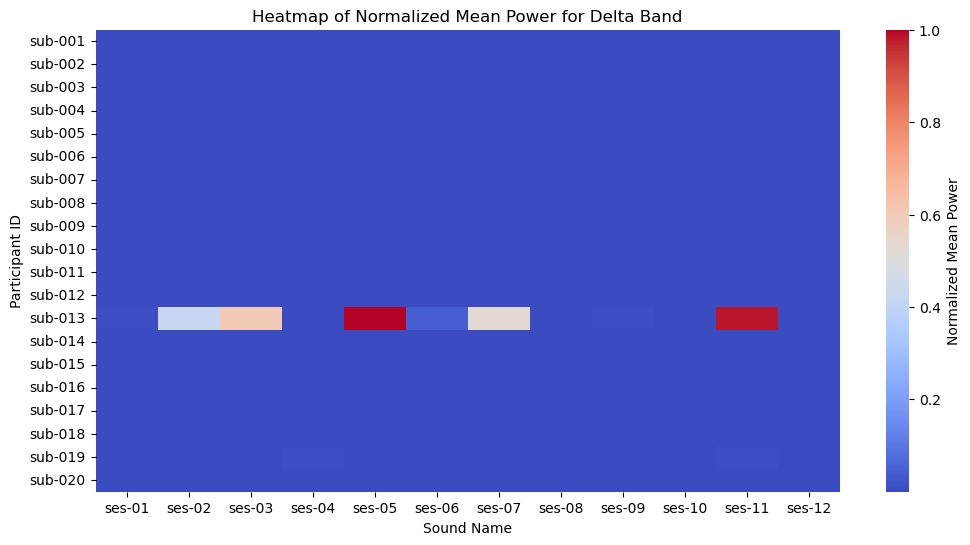

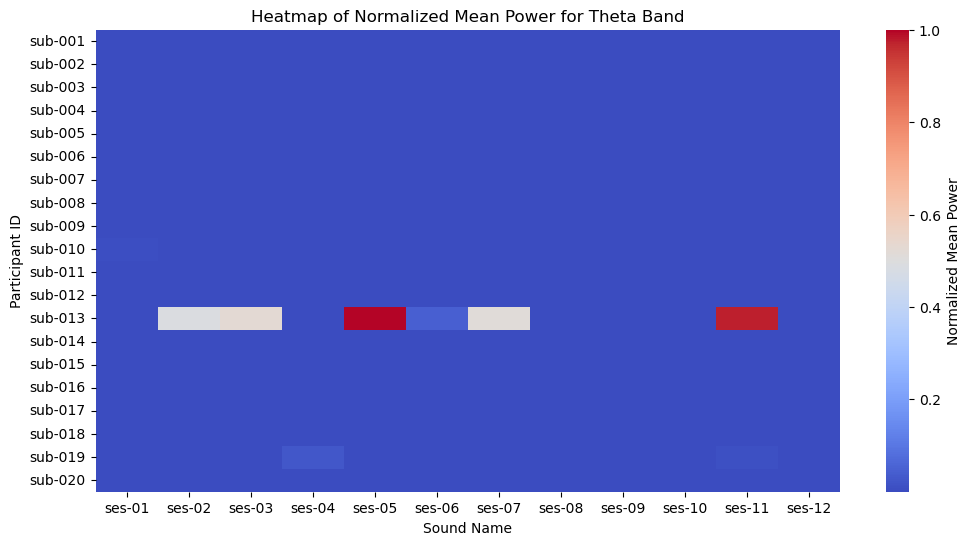

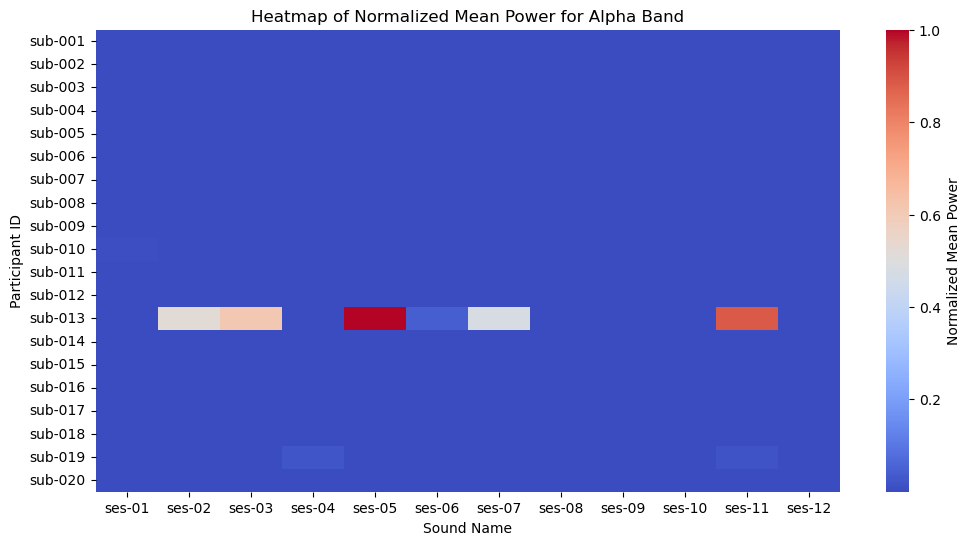

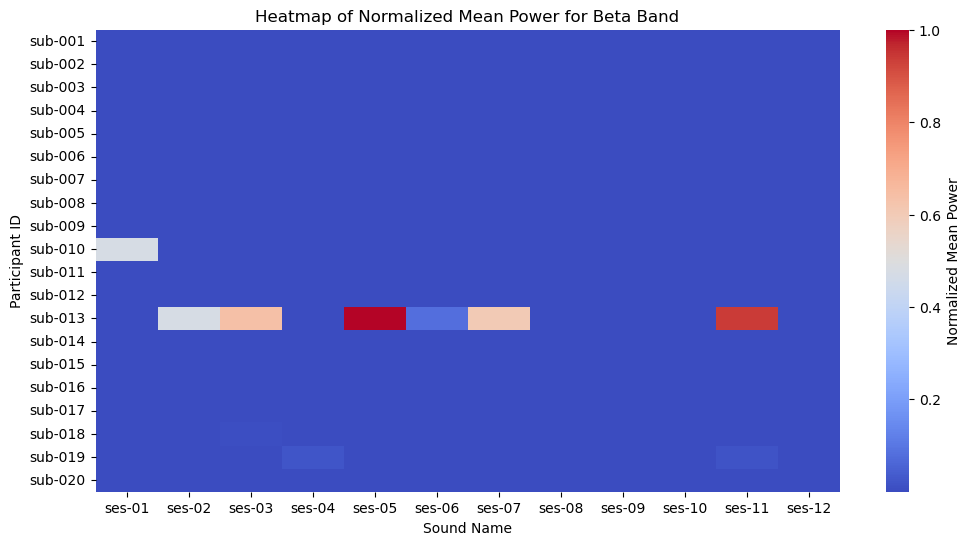

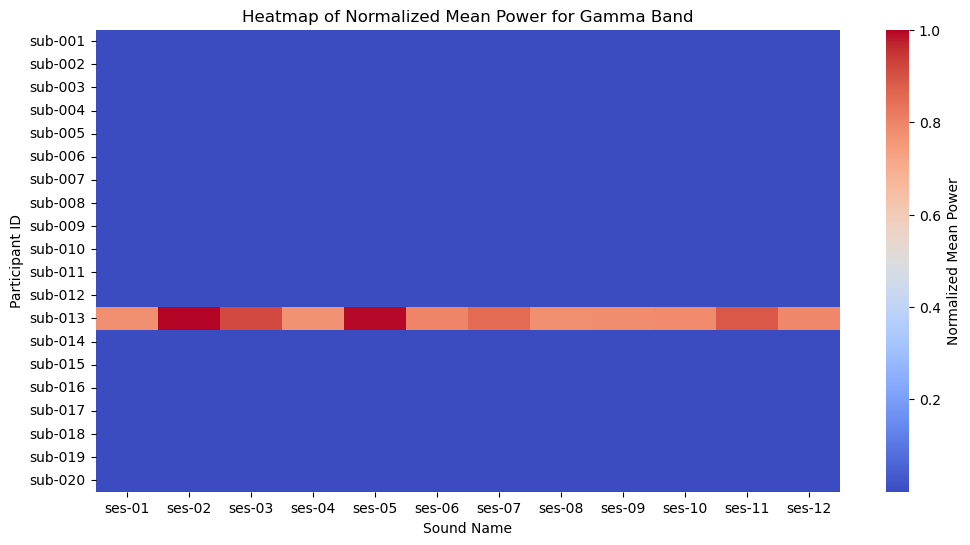

In [22]:
# Pivot the DataFrame to create a matrix with participants as rows, sounds as columns, and mean powers as values
mean_powers_matrix = df_band_powers.pivot_table(index='Participant ID', columns='Sound Name', values='Mean Power', aggfunc=np.mean)

# Create a heatmap for each frequency band
for band in bands.keys():
    # Filter the DataFrame for the current frequency band
    df_band = df_band_powers[df_band_powers['Frequency Band'] == band]

    # Create the mean powers matrix for the current band
    mean_powers_matrix_band = df_band.pivot_table(index='Participant ID', columns='Sound Name', values='Mean Power', aggfunc=np.mean)

    # Normalize the mean powers by dividing by the maximum value in the matrix
    normalized_mean_powers_matrix_band = mean_powers_matrix_band / mean_powers_matrix_band.max().max()

    # Create the heatmap
    plt.figure(figsize=(12, 6))  # Increase the figure size
    sns.heatmap(normalized_mean_powers_matrix_band, annot=False, cmap='coolwarm', cbar_kws={'label': 'Normalized Mean Power'})
    plt.title(f'Heatmap of Normalized Mean Power for {band.capitalize()} Band')
    plt.xlabel('Sound Name')
    plt.ylabel('Participant ID')

plt.show()


In [24]:
import matplotlib as mpl

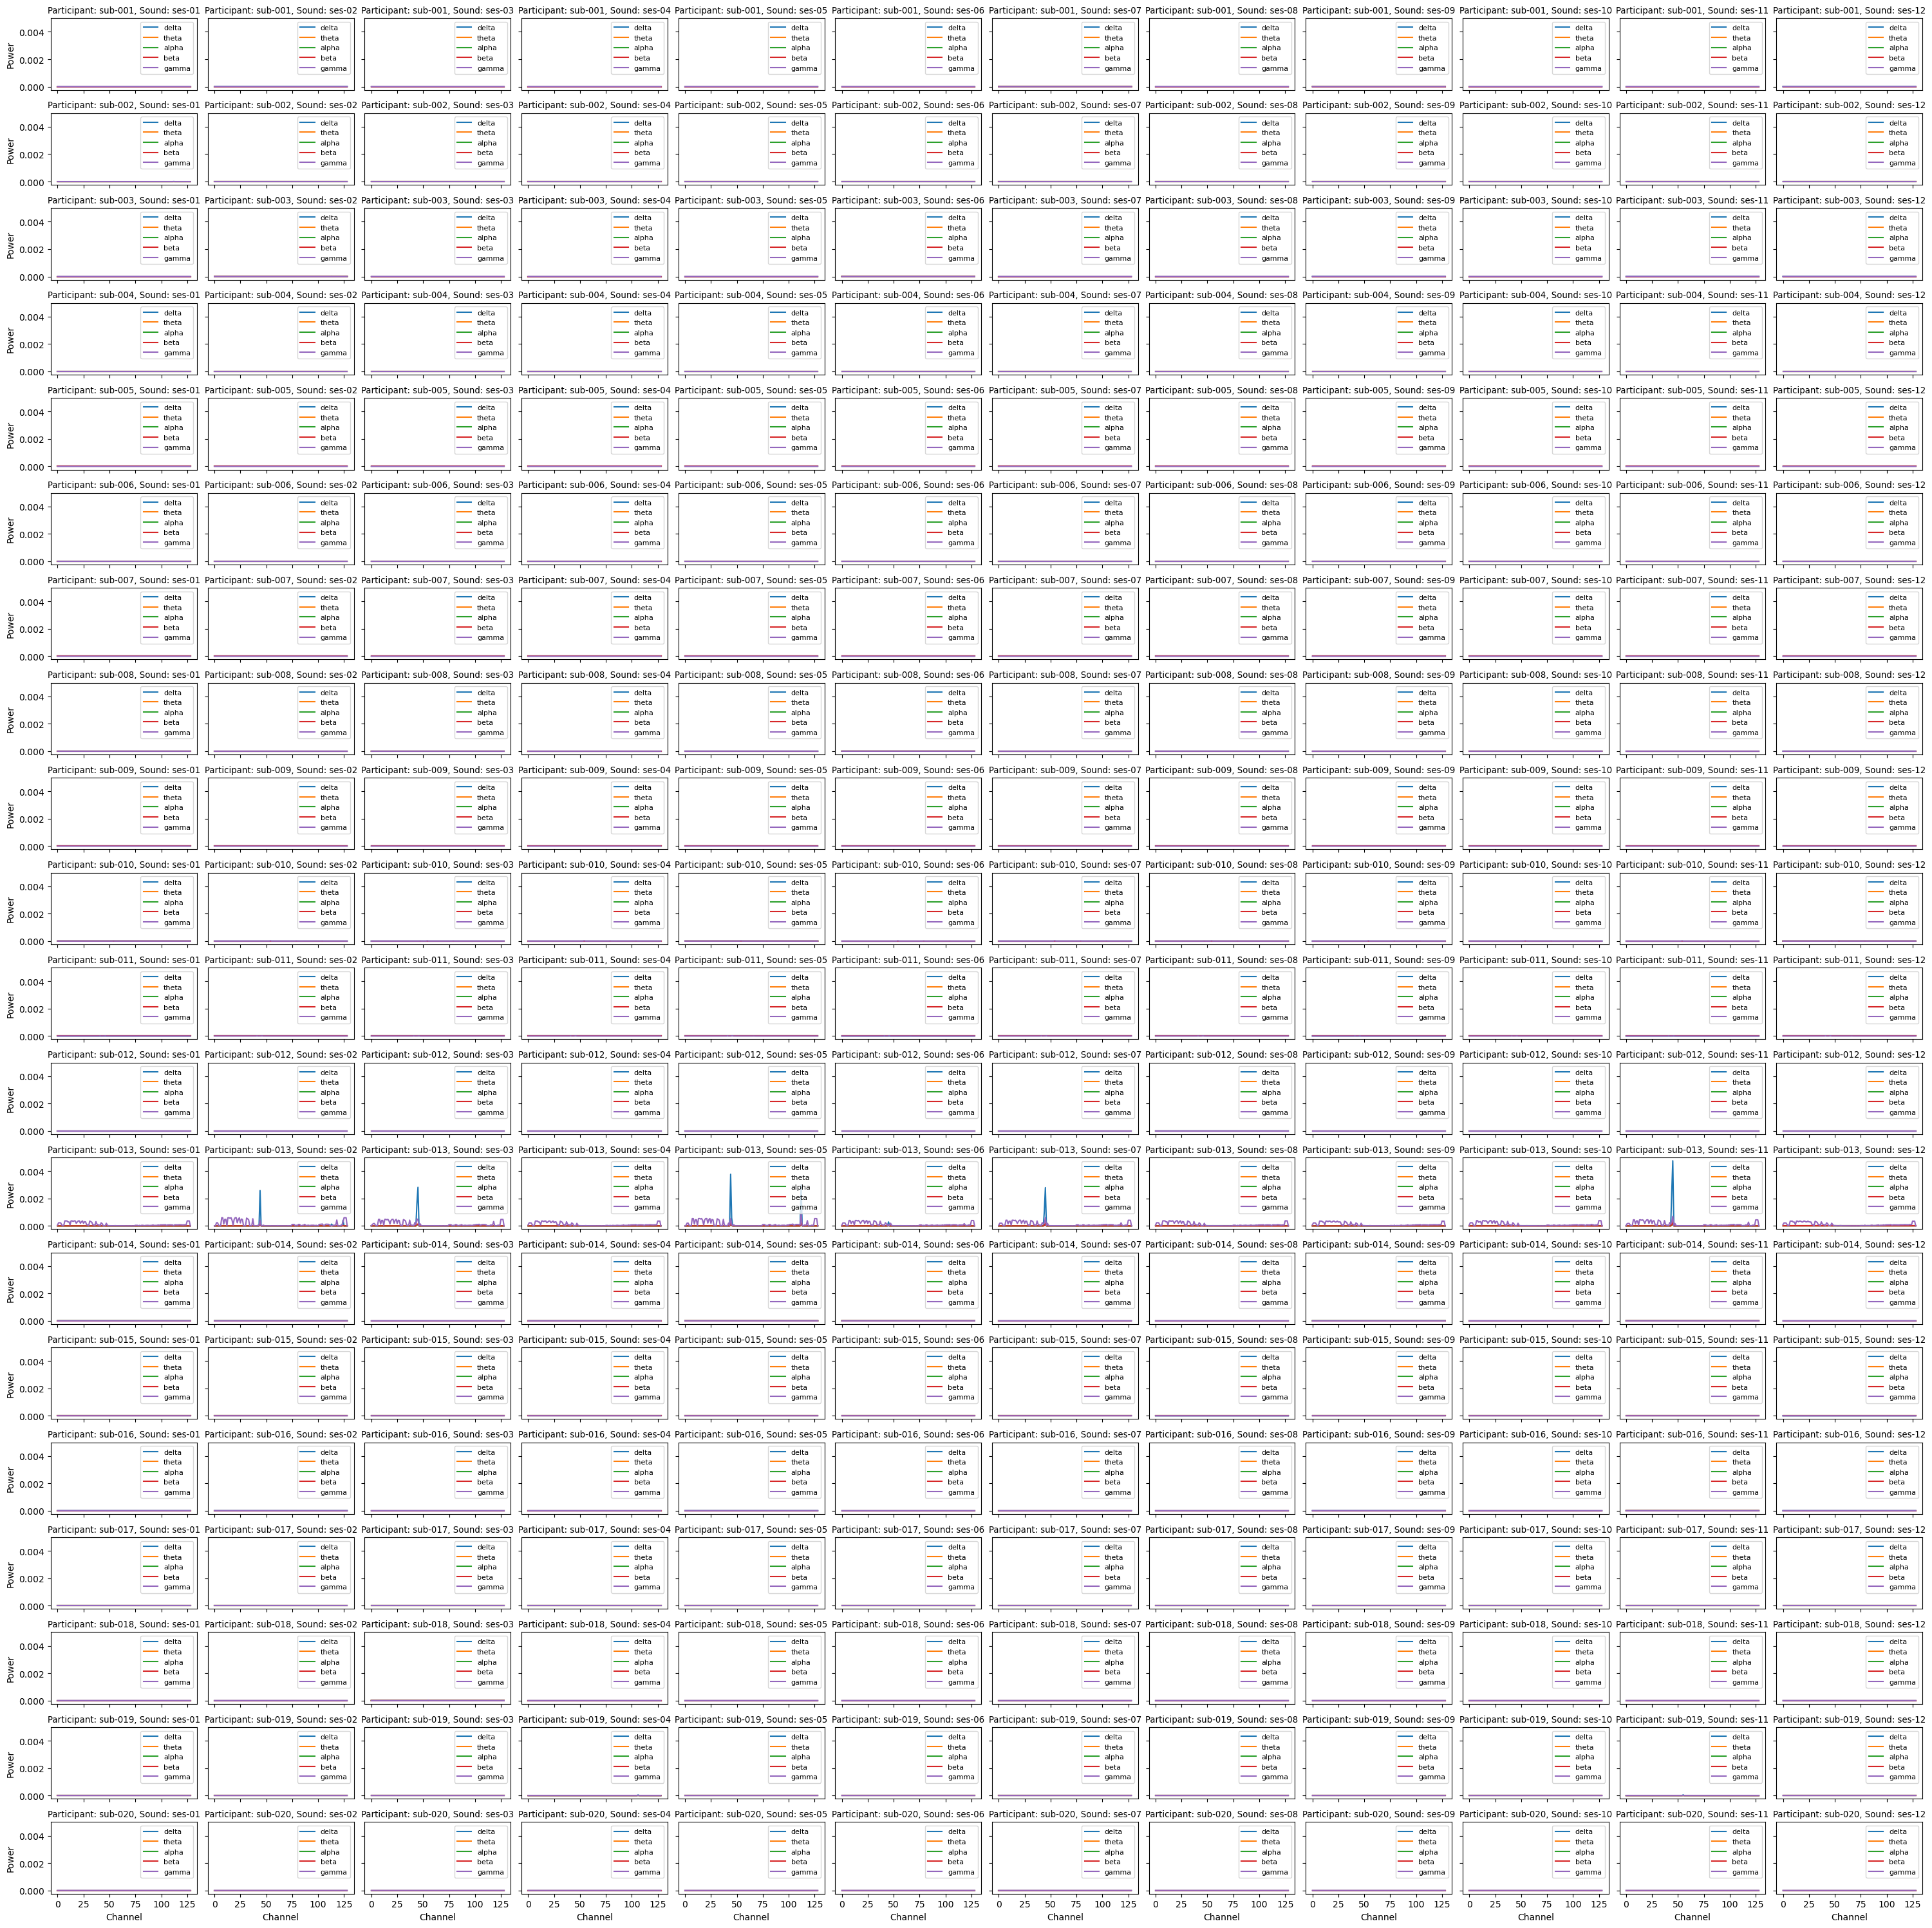

In [25]:
# Assuming band_powers_data is a dictionary with the following structure:
# band_powers_data[participant_id][sound_name][band] = band_power

# Set up the figure and axes for the line plots
fig, axes = plt.subplots(len(participant_ids), len(sound_names), figsize=(30, 30), sharex=True, sharey=True)

# Set font size
mpl.rcParams['font.size'] = 8

for i, participant_id in enumerate(participant_ids):
    for j, sound_name in enumerate(sound_names):
        # Extract band powers for the current participant and sound
        band_powers = band_powers_data[participant_id][sound_name]

        # Plot the band powers for each frequency band as a line plot
        for band, power in band_powers.items():
            axes[i, j].plot(power, label=band)
            axes[i, j].set_title(f'Participant: {participant_id}, Sound: {sound_name}')
            axes[i, j].legend()

# Set axis labels
for ax in axes[-1, :]:
    ax.set_xlabel('Channel')
for ax in axes[:, 0]:
    ax.set_ylabel('Power')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


In [33]:
# Assuming band_powers_data is a nested dictionary with keys: participant_id -> sound_name -> band_powers
# Combine all participants' data for each session into a single DataFrame
data_per_session = {}

for participant_id in participant_ids:
    for sound_name in sound_names:
        if sound_name not in data_per_session:
            data_per_session[sound_name] = []

        data_per_session[sound_name].append(band_powers_data[participant_id][sound_name])


In [39]:
# Assuming band_powers_data is a nested dictionary with keys: participant_id -> sound_name -> band_powers
# Combine all participants' data for each session into a single DataFrame
data_per_session = {}

for participant_id in participant_ids:
    for sound_name in sound_names:
        if sound_name not in data_per_session:
            data_per_session[sound_name] = []

        data_per_session[sound_name].append(band_powers_data[participant_id][sound_name])

# Calculate correlation matrix for each session
correlation_matrices = {}

print(data_per_session['ses-01'])


for sound_name in sound_names:
    if len(data_per_session[sound_name]) > 0:
        df = pd.DataFrame(data_per_session[sound_name], columns=bands.keys())
        correlation_matrix = df.corr()
        print(f"Correlation matrix for {sound_name}:")
        print(correlation_matrix)
        print("\n")

        # Plot the correlation matrix as a heatmap
        plt.figure()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title(f'Correlation Matrix for {sound_name}')
        plt.show()

[{'delta': array([3.49774656e-11, 3.19681108e-11, 1.96016639e-11, 8.41506190e-12,
       5.59008867e-12, 2.29440320e-12, 1.33582295e-12, 1.33192687e-10,
       4.46994815e-11, 1.94091232e-11, 1.16087749e-11, 6.78877906e-12,
       4.10412441e-12, 7.28506733e-11, 3.55231406e-11, 1.73657713e-11,
       6.59570868e-11, 1.44226025e-11, 1.11905633e-11, 8.35447071e-12,
       5.55978731e-11, 3.27729756e-11, 2.11478156e-11, 1.34097112e-11,
       7.31814514e-11, 4.90785440e-11, 1.90027166e-11, 1.18015406e-11,
       6.81223774e-12, 3.70437141e-12, 7.64600693e-13, 4.89779647e-11,
       2.64916601e-11, 1.81016952e-11, 1.38185732e-11, 6.32080811e-12,
       9.22837992e-13, 3.84622333e-11, 1.99679467e-11, 1.36549488e-11,
       9.00859700e-12, 7.76401109e-12, 3.45252711e-11, 2.97435479e-11,
       1.76297523e-11, 1.12438192e-11, 1.07018854e-11, 3.62186382e-11,
       3.54313749e-11, 1.59730552e-11, 1.10728998e-11, 1.03564358e-11,
       6.19827287e-12, 6.95290105e-12, 1.84351018e-12, 3.51833939e

/var/folders/zt/cc6s6fxx7xd990t2r3k29yqw0000gn/T/ipykernel_3583/2539914643.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 640x480 with 0 Axes>